In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import matplotlib.pyplot as plt

In [3]:
Path =  "./Data/Twitter_Data.csv"

In [4]:
train_df = pd.read_csv(Path)
display(train_df.head())

,news,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
train_df['news'][2]

'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax'

In [6]:
print(train_df['category'].value_counts())

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64


In [7]:
train_df.shape

(162980, 2)

In [8]:
print(f" Shape of train_df data frame: {train_df.shape}")

 Shape of train_df data frame: (162980, 2)


In [9]:
train_df['category'][1]

0.0

**DATA UNDERSTANDING**

The folllowing will be explored to better interpret the datasets being used

*   check for data info
*   Check for missing values
*   Check for duplicates
*   Check for unique values
*   create visuals

In [10]:
print(train_df.isnull().sum())

news        4
category    7
dtype: int64


In [11]:
train_df.dropna(inplace = True)

In [12]:
print(train_df.isnull().sum())

news        0
category    0
dtype: int64


In [13]:
# Rename the category to label
train_df.rename(columns= {"category": "label"}, inplace= True)


In [14]:
train_df.head()

,news,label
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [15]:
##create copies of the datasets
train_data= train_df.copy()

In [16]:
train_df.isna().sum()

news     0
label    0
dtype: int64

**DUPLICATES**

In [17]:
train_df.duplicated().sum()
# train_df[train_df.duplicated()]

1

In [18]:
# drop duplicates
train_df = train_df.drop_duplicates()

In [19]:
train_df.duplicated().sum()

0

**Remarks** : 
There are no duplicates

### **UNIQUE VALUES**

In [20]:
train_df.label.unique()
#  0 , 1 , -1

array([-1.,  0.,  1.])

In [21]:
positive = train_df[train_df["label"]==  1]
negative = train_df[train_df["label"]== -1]
neutral  = train_df[train_df["label"]==  0]

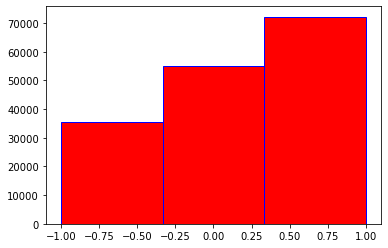

In [22]:
# plot_1=px.histogram(data_frame= train_df, x= "label", title= "Distribution of Sentiments") 
plt.hist(train_df['label'], bins=3, color='red', edgecolor='blue')                    
plt.show()

### Stopword count

In [23]:
import spacy 
nlp = spacy.load("en_core_web_lg")

In [24]:
from spacy.lang.en.stop_words import STOP_WORDS

In [25]:
len(STOP_WORDS)

326

In [26]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [27]:
# Stopword counts 
train_df['stop_word'] = train_df['news'].apply(lambda coun : len([t for t in coun.split() if t in STOP_WORDS]))
train_df.head()

,news,label,stop_word
0,when modi promised “minimum government maximum...,-1.0,14
1,talk all the nonsense and continue all the dra...,0.0,7
2,what did just say vote for modi welcome bjp t...,1.0,10
3,asking his supporters prefix chowkidar their n...,1.0,16
4,answer who among these the most powerful world...,1.0,6


In [28]:
train_df['Counts_words'] = train_df['news'].apply(lambda coun : len(coun.split()))
train_df.head()
# min(train_df['Counts_words'])
max_count = train_df['Counts_words'].max()

# Filter the DataFrame to get rows with the maximum word count
rows_with_max_count = train_df[train_df['Counts_words'] == max_count]
rows_with_max_count
33

33

In [29]:
coun = "this is sneha rani here I find stop words"
for t in coun.split():
    if t in STOP_WORDS:
        print(t)

this
is
here


In [30]:
# Count numaric in dataset
train_df['numaric'] = train_df['news'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))
train_df.head() 

,news,label,stop_word,Counts_words,numaric
0,when modi promised “minimum government maximum...,-1.0,14,33,0
1,talk all the nonsense and continue all the dra...,0.0,7,13,0
2,what did just say vote for modi welcome bjp t...,1.0,10,22,0
3,asking his supporters prefix chowkidar their n...,1.0,16,34,0
4,answer who among these the most powerful world...,1.0,6,14,0


## Preprocessing and Cleaning:

### 1. Convert to Lower case

In [31]:
# CONVERT TO lOWER CASE :
train_df['news'] = train_df['news'].apply(lambda x : x.lower())
train_df.head(10)

,news,label,stop_word,Counts_words,numaric
0,when modi promised “minimum government maximum...,-1.0,14,33,0
1,talk all the nonsense and continue all the dra...,0.0,7,13,0
2,what did just say vote for modi welcome bjp t...,1.0,10,22,0
3,asking his supporters prefix chowkidar their n...,1.0,16,34,0
4,answer who among these the most powerful world...,1.0,6,14,0
5,kiya tho refresh maarkefir comment karo,0.0,0,6,0
6,surat women perform yagna seeks divine grace f...,0.0,3,12,0
7,this comes from cabinet which has scholars lik...,0.0,5,14,0
8,with upcoming election india saga going import...,1.0,3,24,0
9,gandhi was gay does modi,1.0,2,5,0


### 2. Remove Punctuation and special character 

`re.sub()` is a function provided by the `re` module in Python, which stands for "regular expression substitution". It is used for replacing occurrences of a pattern in a string with another string.

Here's the basic syntax of re.sub(): <br>
`re.sub(pattern, replacement, string, count=0, flags=0)`<br>
**Example**
```
string = "The quick brown fox jumps over the lazy dog."
pattern = r"\b\w{4}\b"  # Matches words with exactly four characters
replacement = "****"
new_string = re.sub(pattern, replacement, string)
print(new_string)
```
The output is: <br>
`The **** **** fox **** **** the **** dog.`


In [32]:
import re
train_df['news'] = train_df['news'].apply(lambda x : re.sub('[^\w\s]+','',x))
train_df.head(3)

# The pattern '[^\w\s]+' matches any character that is not a
# word character or whitespace. The re.sub() function replaces 
# these characters with an empty string, effectively removing all 
# punctuation and special characters from the tweet.

,news,label,stop_word,Counts_words,numaric
0,when modi promised minimum government maximum ...,-1.0,14,33,0
1,talk all the nonsense and continue all the dra...,0.0,7,13,0
2,what did just say vote for modi welcome bjp t...,1.0,10,22,0


#### There is another way to remove all special and punctuation mark from text by using spacy

In [33]:
# %%time
# train_df['news']=train_df['news'].apply(lambda x: " ".join(token.text for token in nlp(x) if token.is_alpha or token.is_digit))

In [34]:
train_df['news'][100]

'why limited here are other prefixes for twitter that perhaps more accurately capture the state the citizens '

### 3. Contaction to Expansion > can't TO can not ,you'll TO you will

In [35]:
# Contaction to Expansion > can't TO can not ,you'll TO you will
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [36]:
def cont_to_exp(x): 
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x 

In [37]:
cont_to_exp("y'all")

'you all'

In [38]:
cont_to_exp("sneha")

'sneha'

In [39]:
%%time
train_df['news'] = train_df['news'].apply(lambda x : cont_to_exp(x))

Wall time: 11.2 s


### Count and Remove all emails

In [40]:
import re
# Regular expression pattern to match email addresses
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [41]:
train_df['emails'] = train_df['news'].apply(lambda i : re.findall(email_pattern , i))
train_df['email-counts'] =train_df['emails'].apply(lambda i : len(i))
train_df[train_df['email-counts'] > 0]

,news,label,stop_word,Counts_words,numaric,emails,email-counts


Hence there is no email id in the news col

In [42]:
train_df['news'] = train_df['news'].apply(lambda x : re.sub(email_pattern , '' , x))
train_df.head()

,news,label,stop_word,Counts_words,numaric,emails,email-counts
0,when modi promised minimum government maximum ...,-1.0,14,33,0,[],0
1,talk all the nonsense and continue all the dra...,0.0,7,13,0,[],0
2,what did just say vote for modi welcome bjp t...,1.0,10,22,0,[],0
3,asking his supporters prefix chowkidar their n...,1.0,16,34,0,[],0
4,answer who among these the most powerful world...,1.0,6,14,0,[],0


In [43]:
train_df.drop( columns = ['emails','email-counts'] ,inplace = True)
train_df.head(2)

,news,label,stop_word,Counts_words,numaric
0,when modi promised minimum government maximum ...,-1.0,14,33,0
1,talk all the nonsense and continue all the dra...,0.0,7,13,0


### 5 Count and Remove URLs 

In [44]:
a = " watch our channal, http://khanyoutube.com/rehanraza"
re.findall(r'https?://[^\s<>"]+|www\.[^\s<>"]+', a)

['http://khanyoutube.com/rehanraza']

In [45]:
url_pattern = 'https?://[^\s<>"]+|www\.[^\s<>"]+'
train_df['news'] = train_df['news'].apply(lambda i : re.sub(url_pattern,'', i))
train_df.head()


,news,label,stop_word,Counts_words,numaric
0,when modi promised minimum government maximum ...,-1.0,14,33,0
1,talk all the nonsense and continue all the dra...,0.0,7,13,0
2,what did just say vote for modi welcome bjp t...,1.0,10,22,0
3,asking his supporters prefix chowkidar their n...,1.0,16,34,0
4,answer who among these the most powerful world...,1.0,6,14,0


### 6. Remove multiple Space

In [46]:
# Remove multiple spaces 
x = "Thanks for     accepting my     project     Thanks   again"
print("@".join(x.split()))
print(" ".join(x.split()))

Thanks@for@accepting@my@project@Thanks@again
Thanks for accepting my project Thanks again


In [47]:
train_df['news'] = train_df['news'].apply(lambda x : " ".join(x.split()))
train_df.tail(5)

,news,label,stop_word,Counts_words,numaric
162975,why these 456 crores paid neerav modi not reco...,-1.0,5,18,1
162976,dear rss terrorist payal gawar what about modi...,-1.0,8,36,1
162977,did you cover her interaction forum where she ...,0.0,5,9,0
162978,there big project came into india modi dream p...,0.0,4,13,0
162979,have you ever listen about like gurukul where ...,1.0,16,34,0


### 7. Remove Stopwords

In [48]:
# Remove stopwords
# Example
x = "this is stopwords removal code use this"
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stopwords removal code use'

In [49]:
train_df['news'] = train_df['news'].apply(lambda x : " ".join([t for t in x.split() if t not in STOP_WORDS]))
train_df.head(3)

,news,label,stop_word,Counts_words,numaric
0,modi promised minimum government maximum gover...,-1.0,14,33,0
1,talk nonsense continue drama vote modi,0.0,7,13,0
2,vote modi welcome bjp told rahul main campaign...,1.0,10,22,0


In [50]:
# Stopword counts 
train_df['stop_word'] = train_df['news'].apply(lambda coun : len([t for t in coun.split() if t in STOP_WORDS]))
train_df[train_df['stop_word'] != 0]
# Hence there is no Stopwords in the file

,news,label,stop_word,Counts_words,numaric


In [51]:
train_df.head(3)

,news,label,stop_word,Counts_words,numaric
0,modi promised minimum government maximum gover...,-1.0,0,33,0
1,talk nonsense continue drama vote modi,0.0,0,13,0
2,vote modi welcome bjp told rahul main campaign...,1.0,0,22,0


### 8. Remove Number

In [52]:
x = "learning How to remove number from meassage 1 like 2 and 19"
" ".join(t for t in x.split() if t.isdigit() is False )

'learning How to remove number from meassage like and'

Code for remove numbers from news

In [53]:
train_df['news'] = train_df['news'].apply(lambda x : " ".join([t for t in x.split() if t.isdigit() is False]))
train_df.head(4)

,news,label,stop_word,Counts_words,numaric
0,modi promised minimum government maximum gover...,-1.0,0,33,0
1,talk nonsense continue drama vote modi,0.0,0,13,0
2,vote modi welcome bjp told rahul main campaign...,1.0,0,22,0
3,asking supporters prefix chowkidar names modi ...,1.0,0,34,0


Checking counts of number in news, it should be zero

In [54]:
train_df['numaric'] = train_df['news'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))
train_df[train_df['numaric']!=0]

,news,label,stop_word,Counts_words,numaric


Hence there is no numaric value in dataset

In [55]:
# # # Here we drop stop_word and numaric columns.
train_df.drop(columns = ['stop_word','numaric'] , inplace = True)

In [56]:
# This is final data set
train_df.head(2) 

,news,label,Counts_words
0,modi promised minimum government maximum gover...,-1.0,33
1,talk nonsense continue drama vote modi,0.0,13


### 9. Remove most frequent words

In [57]:
# We have removed stopwords but also we have some words which is frequntly used in dataset :

#First we will join all dataset like this 
" ".join(train_df.head(2)['news'])

'modi promised minimum government maximum governance expected begin difficult job reforming state years justice state business exit psus temples talk nonsense continue drama vote modi'

In [58]:
# train_dff['new'][1]
train_df['news'][2]

'vote modi welcome bjp told rahul main campaigner modi think modi relax'

In [59]:
print(train_df.shape)
num_keep = 10000
train_dff = train_df.sample(n=num_keep,random_state = 4)
print(train_dff.shape)

(162968, 3)
(10000, 3)


In [60]:
# Lets join whole dataset of tweets
whole_news =" ".join(train_dff['news'])

In [61]:
print(whole_news)

vote modi gst affordable housing remaining congrats time prove fit role work development working modi great experience looking forward bengaluru change president works hrs day like modi rahuls burning jealousy burn making difference modi fact push sitting fence modis camp expect idiots learn continue hate modi campaign real raid election tracker live people india decided mandate modi confirmed meerut news18 let protect people grave disease grip india including modi gadda towering person country face modi modiji phase repacking upas policy programme schemes choses announce drdo isros decades old work anti satellite weapon new time public packup modi govt modi hatao desh bachao rahul runs kerala modi runs benaras actually beggar doesnt alms village unfortunate names mahatma gandhi nehru modi taken breath gentlemen contribution nation building unparalleled narendra modi public meeting dont mislead public dont exploit emotions support modi upcoming elections instead modi contest election p

In [62]:
doc = nlp(whole_news)

In [63]:
split_text = whole_news.split()

In [64]:
print(len(doc),  "   " ,len(split_text))

130804     129117


In [65]:
freq_words_spacy = pd.Series([t.text for t in doc]).value_counts()
freq_words_spacy

modi          9566
india         1758
nt            1243
people         880
bjp            860
              ... 
azaan            1
divya            1
thatgood         1
countrywhy       1
beautifuly       1
Length: 19827, dtype: int64

In [66]:
freq_word_split = pd.Series(split_text).value_counts()
freq_word_split

modi          9566
india         1758
people         880
bjp            860
congress       754
              ... 
udont            1
stoppd           1
azaan            1
divya            1
beautifuly       1
Length: 19824, dtype: int64

In [67]:
freq_word_split['amp']

4

<font color=green>Here we see the most used word is <font color = blue>url -> 5494, user- > 4639</font> so we can eliminate this.</font>

**Final code to remove Common words and Rare words**

In [68]:
Fc2 = freq_words_spacy[0:2]
rare_word = freq_words_spacy[freq_words_spacy.values == 1]
# Skip to remove rare words because, we have 7701 rare word out of 10,000 words. so cazz
# fr20 =  freq_words_spacy[-20:0]

In [69]:
train_dff['news'] = train_dff['news'].apply(lambda x : " ".join([t for t in x.split() if t not in Fc2]))

In [70]:
# # For checking 
# whole_tweets=" ".join(train_df['tweets'])
# split_text = whole_tweets.split()
# print("Length of whole tweets in dataset : " ,len(split_text))
# freq_w=pd.Series(split_text).value_counts()
# freq_w[0:5]

In [71]:
train_dff.head()

,news,label,Counts_words
108666,vote gst affordable housing remaining,0.0,8
19092,congrats time prove fit role work development ...,1.0,24
119205,president works hrs day like,0.0,9
65086,rahuls burning jealousy burn making difference...,-1.0,30
54050,continue hate campaign,-1.0,7


Here you can see there is no **url** and **users**.
So this task is done.

## Lemmatization using spacy

In [72]:
import spacy 
def lemmatize_text(text):
    doc = nlp(text)
    lemma_text = " ".join(token.lemma_ for token in doc)
    return lemma_text 

In [73]:
train_dff['lemmatized_news'] = train_dff['news'].apply(lemmatize_text)
train_dff.head(10)

,news,label,Counts_words,lemmatized_news
108666,vote gst affordable housing remaining,0.0,8,vote gst affordable housing remain
19092,congrats time prove fit role work development ...,1.0,24,congrats time prove fit role work development ...
119205,president works hrs day like,0.0,9,president work hrs day like
65086,rahuls burning jealousy burn making difference...,-1.0,30,rahuls burning jealousy burn make difference f...
54050,continue hate campaign,-1.0,7,continue hate campaign
79867,real raid,1.0,2,real raid
88733,election tracker live people decided mandate c...,1.0,16,election tracker live people decide mandate co...
133765,let protect people grave disease grip includin...,0.0,16,let protect people grave disease grip include ...
64676,towering person country face,0.0,16,tower person country face
53791,modiji phase repacking upas policy programme s...,1.0,32,modiji phase repacke upas policy programme sch...


In [74]:
print(train_dff['news'][19092])
print(train_dff['lemmatized_news'][19092])

congrats time prove fit role work development working great experience looking forward bengaluru change
congrats time prove fit role work development work great experience look forward bengaluru change


## Splliting dataset

In [75]:
X = train_dff['lemmatized_news'] 
y = train_dff['label']
print(X)
print(y)

108666                   vote gst affordable housing remain
19092     congrats time prove fit role work development ...
119205                          president work hrs day like
65086     rahuls burning jealousy burn make difference f...
54050                                continue hate campaign
                                ...                        
5057      odisha come force help achieve true destiny le...
148699                         mull main reasoni shall vote
79732     plea do not use bhakts proud bhakt har har gha...
122306    creature military ignore reality try paint ant...
106810    good interview question reply respected prime ...
Name: lemmatized_news, Length: 10000, dtype: object
108666    0.0
19092     1.0
119205    0.0
65086    -1.0
54050    -1.0
         ... 
5057      1.0
148699    1.0
79732     1.0
122306    1.0
106810    1.0
Name: label, Length: 10000, dtype: float64


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33  ,  random_state=42)

In [77]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(6700,) (3300,)
(6700,) (3300,)


## Transform Counts to Frequencies with Tf-idf
While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)  # but this line do both count vectorization and TFIDF transformation.
(X_train_tfidf)

<6700x13336 sparse matrix of type '<class 'numpy.float64'>'
	with 75034 stored elements in Compressed Sparse Row format>

In [79]:
X_test_tfidf = vectorizer.transform(X_test)  # but this line do both count vectorization and TFIDF transformation.
X_test_tfidf

<3300x13336 sparse matrix of type '<class 'numpy.float64'>'
	with 33046 stored elements in Compressed Sparse Row format>

In [80]:
X_train_tfidf

<6700x13336 sparse matrix of type '<class 'numpy.float64'>'
	with 75034 stored elements in Compressed Sparse Row format>

In [81]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Train a Classifier
Here we'll introduce an SVM classifier that's similar to SVC, called [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). LinearSVC handles sparse input better, and scales well to large numbers of samples.

In [82]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.svm import LinearSVC
modelsvc = LinearSVC(max_iter=2000)
from sklearn.linear_model import LogisticRegression
modellrg=LogisticRegression(max_iter = 1000)
from sklearn.ensemble import RandomForestClassifier
modelrfc = RandomForestClassifier()

In [83]:
modelsvc.fit(X_train_tfidf , y_train)

LinearSVC(max_iter=2000)

In [84]:
modellrg.fit(X_train_tfidf , y_train)

LogisticRegression(max_iter=1000)

In [85]:
modelrfc.fit(X_train_tfidf , y_train)

RandomForestClassifier()

In [86]:
# For Train data by LinearSVC
X_train_svc_pred = modelsvc.predict(X_train_tfidf)
X_train_svc_acc = metrics.accuracy_score(y_train,X_train_svc_pred)
# Print the overall accuracy
print("Print accuracy score of training data" , X_train_svc_acc)

Print accuracy score of training data 0.9846268656716418


In [87]:
# For Test data by LinearSVC
X_test_svc_pred = modelsvc.predict(X_test_tfidf)
X_test_svc_acc = metrics.accuracy_score(y_test,X_test_svc_pred)
# Print the overall accuracy
print("Print accuracy score of testing data" , X_test_svc_acc)

Print accuracy score of testing data 0.6987878787878787


In [88]:
# For train data by Logistic Regression 
X_train_lrg_pred = modellrg.predict(X_train_tfidf)
X_train_lrg_acc = metrics.accuracy_score(y_train , X_train_lrg_pred)
# Print the overall accuracy
print("Print accuracy score of training data" , X_train_lrg_acc)

Print accuracy score of training data 0.9014925373134328


In [89]:
# For testing data by Logistic Regression 
X_test_lrg_pred = modellrg.predict(X_test_tfidf)
X_test_lrg_acc = metrics.accuracy_score(y_test , X_test_lrg_pred)
# Print the overall accuracy
print("Print accuracy score of testing data" , X_test_lrg_acc)

Print accuracy score of testing data 0.6784848484848485


In [90]:
# For traing data by Random Forest
X_train_rfc_pred = modelrfc.predict(X_train_tfidf)
X_train_rfc_acc = metrics.accuracy_score(y_train , X_train_rfc_pred)
# Print the overall accuracy
print("Print accuracy score of training data" , X_train_rfc_acc)

Print accuracy score of training data 0.9995522388059701


In [91]:
# For testing data by Random Forest
X_test_rfc_pred = modelrfc.predict(X_test_tfidf)
X_test_rfc_acc = metrics.accuracy_score(y_test , X_test_rfc_pred)
# Print the overall accuracy
print("Print accuracy score of testing data" , X_test_rfc_acc)

Print accuracy score of testing data 0.713939393939394


In [92]:
x1 = ['continue hate campaign']
modellrg.predict(vectorizer.transform(x1))

array([-1.])

In [93]:
x1 = ['continue hate campaign']
modellrg.predict(vectorizer.transform(x1))

array([-1.])

In [94]:
x2 = ['This is good news about climate change but in some place their is bad and hate sitution.']
modellrg.predict(vectorizer.transform(x2))

array([-1.])